In [1]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
import random
from statistics import mean

In [2]:
import random

class BatchGDRegression:
    def __init__(self):
        self.intercept_ = 0.0
        self.coefficient_ = []

    def fit(self, x, y, learning_rate=0.001, no_epochs=1000):
        self.coefficient_ = [random.random() for _ in range(len(x[0]) + 1)]
        for epoch in range(no_epochs):
            errors = []
            for i in range(len(x)):
                y_computed = self.eval(x[i])
                errors.append(y_computed - y[i])
            error = mean(errors)
            for i in range(len(x)):
                for j in range(0, len(x[0])):
                    self.coefficient_[j] = self.coefficient_[j] - learning_rate * error * x[i][j]
                self.coefficient_[len(x[0])] = self.coefficient_[len(x[0])] - learning_rate * error * 1
        self.intercept_ = self.coefficient_[-1]
        self.coefficient_ = self.coefficient_[:-1]

    def eval(self, xi):
        yi = self.coefficient_[-1]
        for j in range(len(xi)):
            yi += self.coefficient_[j] * xi[j]
        return yi

    def predict(self, x):
        y_computed = [self.eval(xi) for xi in x]
        return y_computed

class StochasticGDRegression:
    def __init__(self):
        self.intercept_ = 0.0
        self.coefficient_ = []

    def fit(self, x, y, learning_rate=0.001, no_epochs=1000):
        n_features = len(x[0])
        self.coefficient_ = [random.random() for _ in range(n_features + 1)]

        for epoch in range(no_epochs):
            for xi, yi in zip(x, y):
                y_computed = self.eval(xi)
                crt_error = y_computed - yi
                self.coefficient_[:-1] = [c - learning_rate * crt_error * xi[j] for j, c in enumerate(self.coefficient_[:-1])]
                self.coefficient_[-1] = self.coefficient_[-1] - learning_rate * crt_error

        self.intercept_ = self.coefficient_[-1]
        self.coefficient_ = self.coefficient_[:-1]

    def eval(self, xi):
        return self.intercept_ + sum(c * xi[j] for j, c in enumerate(self.coefficient_))

    def predict(self, x):
        return [self.eval(xi) for xi in x]


In [3]:
def loadData(filename, inputFeatures, outputFeature):
    file = pd.read_csv(filename)
    file = file.dropna()
    features = [[float(value) for value in file[feature]] for feature in inputFeatures]
    outputFeature = [float(value) for value in file[outputFeature]]
    return features, outputFeature

def plotHistogram(x, variable_name):
    plt.hist(x, 10)
    plt.title('Histogram of ' + variable_name)
    plt.show()
    
def plotLinearity(inputFeature, outputFeature, inputName, outputName):
    plt.plot(inputFeature, outputFeature, 'ro')
    plt.xlabel(inputName)
    plt.ylabel(outputName)
    plt.title(inputName + ' vs. ' + outputName)
    plt.show()


In [4]:
def trainAndTest(features, result):
    np.random.seed(5)
    indexes = [i for i in range(len(result))]
    trainSampleIndexes = np.random.choice(indexes, int(0.8 * len(result)), replace=False)
    validationSampleIndexes = [i for i in range(len(result)) if i not in trainSampleIndexes]
    trainFeatures = []
    validationFeatures = []
    for feature in features:
        trainFeatures.append([feature[i] for i in trainSampleIndexes])
        validationFeatures.append([feature[i] for i in validationSampleIndexes])
    trainResult = [result[i] for i in trainSampleIndexes]
    validationResult = [result[i] for i in validationSampleIndexes]
    return trainFeatures, trainResult, validationFeatures, validationResult

In [5]:
def plotTrainAndTest(trainFeatures, trainResult, validationFeatures, validationResult, inputName, outputName):
    plt.plot(trainFeatures, trainResult, 'ro', label='Training data')
    plt.plot(validationFeatures, validationResult, 'g^', label='Testing data')
    plt.xlabel(inputName)
    plt.ylabel(outputName)
    plt.title('Train and test')
    plt.legend()
    plt.show()
    

In [14]:
from sklearn import linear_model

def learningTool(trainInput, trainOutput, validationInput):
    xx = [[el] for el in trainInput]
    regressor = linear_model.SGDRegressor(alpha=0.01, max_iter=1000)
    regressor.fit(xx, trainOutput)
    w0, w1 = regressor.intercept_[0], regressor.coef_[0]
    print('Learnt model by tool: f(x) =', w0, '+', w1, '* x')
    computedOutputs = regressor.predict([[x] for x in validationInput])
    return w0, w1, computedOutputs

def learningToolMulti(trainInputs, trainOutput, validationInputs):
    xx = [[el1, el2] for el1, el2 in zip(*trainInputs)]
    regressor = linear_model.SGDRegressor(alpha=0.01, max_iter=1000)
    regressor.fit(xx, trainOutput)
    w0, w1, w2 = regressor.intercept_[0], regressor.coef_[0], regressor.coef_[1]
    print('Learnt model by tool: f(x) =', w0, '+', w1, ' x1', '+', w2, '* x2')
    computedOutputs = regressor.predict([[x, y] for x, y in zip(*validationInputs)])
    return w0, w1, w2, computedOutputs

def learningFromScratch(trainInput, trainOutput, validationInput):
    xx = [[el] for el in trainInput]
    regressor = BatchGDRegression()
    regressor.fit(xx, trainOutput)
    w0, w1 = regressor.intercept_, regressor.coefficient_[0]
    print('Learnt model from scratch: f(x) = ', w0, '+', w1, '* x')
    computedOutputs = regressor.predict([[x] for x in validationInput])
    return w0, w1, computedOutputs


def learningFromScratchMulti(trainInputs, trainOutput, validationInputs):
    xx = [[el1, el2] for el1, el2 in zip(*trainInputs)]
    regressor = BatchGDRegression()
    regressor.fit(xx, trainOutput)
    w0, w1, w2 = regressor.intercept_, regressor.coefficient_[0], regressor.coefficient_[1]
    print('Learnt model from scratch: f(x) = ', w0, '+', w1, ' x1', '+', w2, '* x2')
    computedOutputs = regressor.predict([[x, y] for x, y in zip(*validationInputs)])
    return w0, w1, w2, computedOutputs




In [15]:
def calculateError(computedOutput, validationOutput, label):
    error = mean_squared_error(validationOutput, computedOutput)
    print(f'Prediction error by {label}:  ', error)

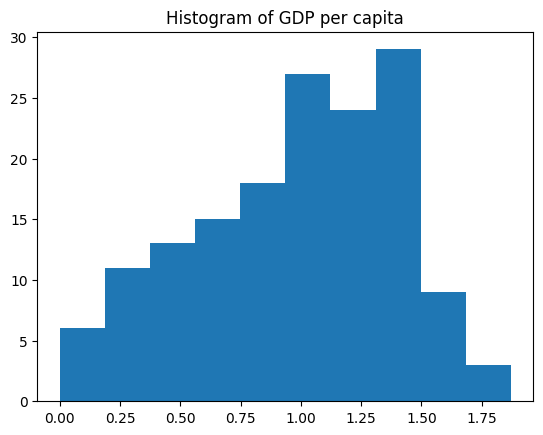

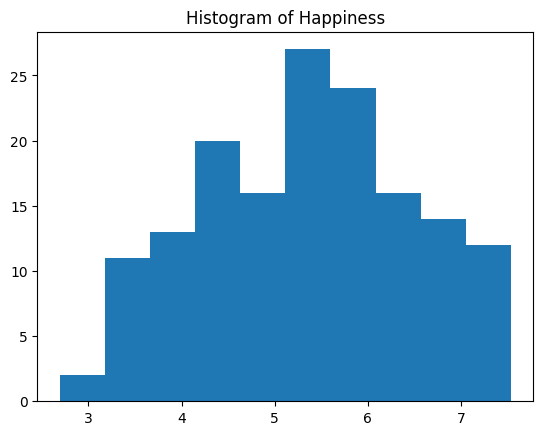

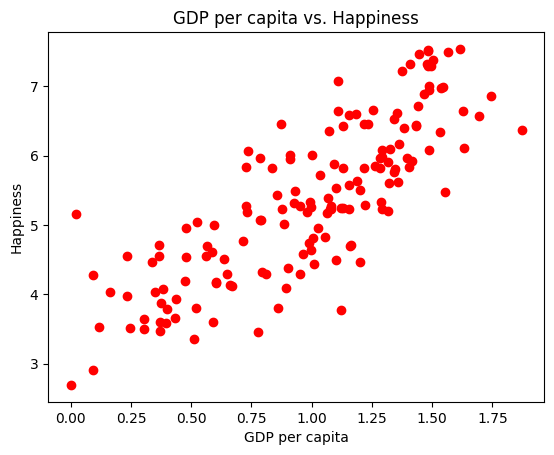

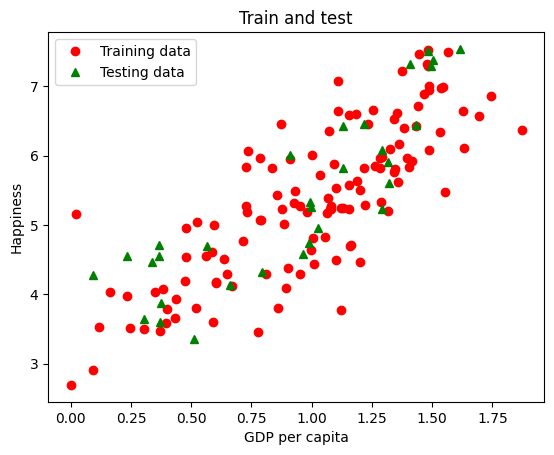

Single feature:
Learnt model by tool: f(x) = 2.760178119878812 + 2.548894003188392 * x
Learnt model from scratch: f(x) =  2.4346193131785365 + 2.9155662285829003 * x
Prediction error by From Scratch:   0.4932561469281213
Multiple features:
Learnt model by tool: f(x) = 2.6544117267007725 + 2.1065967094004088  x1 + 1.0532983547250063 * x2
Learnt model from scratch: f(x) =  2.112001901803107 + 2.4297216365350356  x1 + 1.6161414734274453 * x2
Prediction error by From Scratch:   1.113433341058988


In [17]:
firstFile = 'data/v2_world-happiness-report-2017.csv'
inputs, output = loadData(firstFile, ['Economy..GDP.per.Capita.','Freedom'],
                           'Happiness.Score')


trainInputs,trainOutputs,validationInputs,validationOutputs = trainAndTest(inputs,output)

plotHistogram(inputs[0],"GDP per capita")
plotHistogram(output,"Happiness")
plotLinearity(inputs[0],output, "GDP per capita","Happiness")
plotTrainAndTest(trainInputs[0],trainOutputs,validationInputs[0],validationOutputs,"GDP per capita", "Happiness")

print("Single feature:")
resultByTool = learningTool(trainInputs[0],trainOutputs,validationInputs[0])
resultFromScratch = learningFromScratch(trainInputs[0],trainOutputs,validationInputs[0])
calculateError(resultFromScratch[2],validationOutputs,"From Scratch")
print("Multiple features:")
resultByToolMulti = learningToolMulti(trainInputs,trainOutputs,validationInputs)
resultFromScratchMulti = learningFromScratchMulti(trainInputs,trainOutputs,validationInputs)
calculateError(resultFromScratchMulti[3],validationOutputs,"From Scratch")